### Simple 2D CNN with the MNIST dataset

Example also illustrates computing the confusion matrix, and ROC curves for each class.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

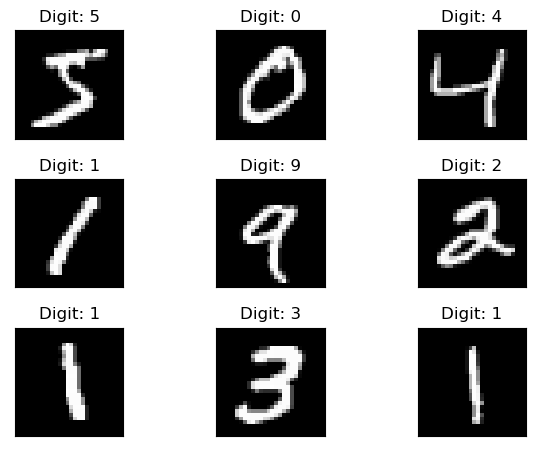

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# --- Input image dimensions ---
img_rows, img_cols = 28, 28

if K.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# --- Model ---
num_classes = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# --- Build model ---
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [8]:
# --- Train model ---
batch_size = 512
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
118/118 [==============================] - 4s 14ms/step - loss: 0.3354 - accuracy: 0.9008 - val_loss: 0.0846 - val_accuracy: 0.9756
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0463 - val_accuracy: 0.9848
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0407 - val_accuracy: 0.9861
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0307 - val_accuracy: 0.9890
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0250 - val_accuracy: 0.9916

In [9]:
# --- Evaluate model ---
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030768750235438347
Test accuracy: 0.9901999831199646


In [10]:
# --- Predictions ---
predictions = model.predict(x_test)
N = len(x_test)
y_predicted = np.zeros(N)
for i in np.arange(0, N):
    predictions_array = predictions[i,:]
    predicted_label = np.argmax(predictions_array)
    y_predicted[i] = int(predicted_label)

313/313 [==============================] - 1s 2ms/step


In [11]:
# --- Confusion matrix ---
from sklearn.metrics import confusion_matrix
y_actu = y_test.astype(int)
y_pred = y_predicted.astype(int)
cm = confusion_matrix(y_actu, y_pred)
print(cm)

[[ 976    0    0    0    0    0    3    1    0    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   2    0 1022    1    1    0    0    6    0    0]
 [   0    0    3 1003    0    2    0    1    1    0]
 [   0    0    0    0  975    0    4    0    0    3]
 [   2    0    0    6    0  880    4    0    0    0]
 [   2    2    0    0    1    2  949    0    2    0]
 [   1    1    4    0    0    0    0 1021    1    0]
 [   2    0    5    1    1    0    0    3  960    2]
 [   2    2    0    2    5    4    0    7    4  983]]


In [12]:
# --- Real positives for each class ---
P = []
for j in np.arange(num_classes):
    k = 0
    for i in np.arange(N):
        if y_actu[i] == j:
            k = k + 1
    print(j,':', k)
    P.append(k)
P = np.array(P)

0 : 980
1 : 1135
2 : 1032
3 : 1010
4 : 982
5 : 892
6 : 958
7 : 1028
8 : 974
9 : 1009


In [13]:
# --- True positives for each class ---
TP = []
for j in np.arange(num_classes):
    k = 0
    for i in np.arange(N):
        if y_pred[i] == y_actu[i] == j:
            k = k + 1
    print(j, ':', k)
    TP.append(k)
TP = np.array(TP)

0 : 976
1 : 1133
2 : 1022
3 : 1003
4 : 975
5 : 880
6 : 949
7 : 1021
8 : 960
9 : 983


In [14]:
# --- True Positive Rate (TPR) / Sensitivity ---
TPR = TP / P
print(TPR)

[0.99591837 0.99823789 0.99031008 0.99306931 0.99287169 0.98654709
 0.99060543 0.99319066 0.98562628 0.97423191]


In [15]:
# --- ROC curve ---
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy.interpolate import interp1d

def ROC_curves(y_actu, pred, classes):
    """Computes ROC curves for each class"""
    
    yt = label_binarize(y_actu, classes=np.arange(classes))
    n_classes = yt.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in np.arange(n_classes):
        fpr[i], tpr[i], _ = roc_curve(yt[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    return fpr, tpr, roc_auc

FPR, TPR, AUC = ROC_curves(y_actu, predictions, num_classes)

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

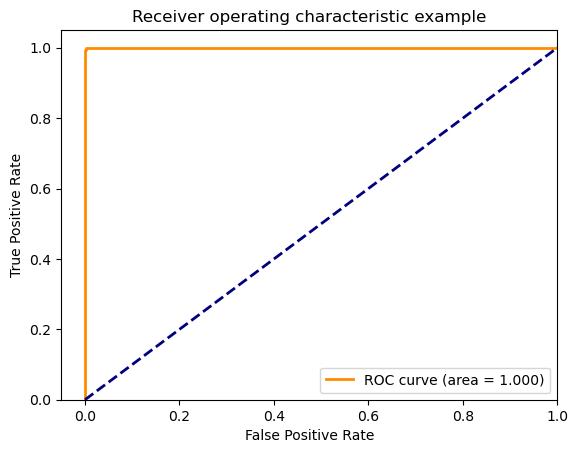

In [17]:
# Example plot
plt.figure()
lw = 2
plt.plot(FPR[0], TPR[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % AUC[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()